# Exploratory Data Analysis (EDA) & Intro

## Objectives

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. Draw meaningfull insights to help job seekers find the best job opportunities across SEA countries

## Final Deliverables

- Create Jupyter Notebooks showcasing core data skills in Python.
- Create a summary page (via [README.md](./05.05.%20README.md)) capture the key findings
- Share the project via GitHub, LinkedIn and Maven's Showcase Platform.

## Questions to answer

1. What are the top 5 in-demand skills for the top 3 most popular data roles in SEA countries?
2. How are in-demand skills trending for Data Analysts in SEA countries?
3. What are the most well-paid data jobs and what are the most well-paid data skills for Data Analysts in SEA countries?
4. What is the most optimal skills to learn for Data Analysts (Highly sought-after and Well-paid) in SEA countries ?
5. 

## Exploratory Data Analysis for all data roles

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exploratory Data Analysis for Data Analysts in SEA countries

In [7]:
asean_countries = ['Vietnam', 'Thailand','Malaysia','Philippines','Indonesia','Laos','Cambodia','Myanmar','Singapore']

1. Filter for `US Data Analyst` roles

In [8]:
df_DA_SEA = df[
    (df['job_country'].isin(asean_countries)) & 
    (df['job_title_short'] == 'Data Analyst')
].copy()

df_DA_SEA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,"[sql, python, r, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,[sql],{'programming': ['sql']}
244,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-10-11 13:17:59,True,False,Singapore,None,NaN,NaN,SATS,"[sql, nosql, azure, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
328,Data Analyst,Finance Data Analyst,"Sepang, Selangor, Malaysia",via Trabajo.org,Full-time,False,Malaysia,2023-07-14 13:11:55,True,False,Malaysia,None,NaN,NaN,AirAsia,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
416,Data Analyst,Data Analyst,"Cebu City, Cebu, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-02-28 13:29:02,True,False,Philippines,None,NaN,NaN,LegalMatch.com,"[sql, javascript, python, java, excel, looker,...","{'analyst_tools': ['excel', 'looker', 'tableau..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785533,Data Analyst,Data Analyst,"Taguig, Metro Manila, Philippines",via LinkedIn,None,False,Philippines,2023-01-23 06:15:25,True,False,Philippines,None,NaN,NaN,HelloConnect,"[sql, python, pandas, tableau, flow]","{'analyst_tools': ['tableau'], 'libraries': ['..."
785560,Data Analyst,Data Architect | Cebu,"Cebu City, Cebu, Philippines",via Kalibrr,Full-time,False,Philippines,2023-01-04 15:59:42,False,False,Philippines,None,NaN,NaN,Accenture Philippines,None,None
785567,Data Analyst,Data Analyst Intern,"Jakarta, Indonesia",via Trabajo.org,"Full-time, Part-time, and Internship",False,Indonesia,2023-12-07 06:22:51,False,False,Indonesia,None,NaN,NaN,MyEduSolve,"[r, java]","{'programming': ['r', 'java']}"
785595,Data Analyst,Data Visualization Analyst,"Pasay, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:52,False,False,Philippines,None,NaN,NaN,TTEC,"[sql, python, r, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."


2. `ASEAN Countries` to explore 

In [9]:
df_plot = df_DA_SEA['job_country'].value_counts().head(10).to_frame()

df_plot

,count
job_country,
Singapore,6632
Philippines,4766
Malaysia,2527
Thailand,1477
Indonesia,461
Vietnam,334
Cambodia,23
Myanmar,17
Laos,3


Text(0, 0.5, '')

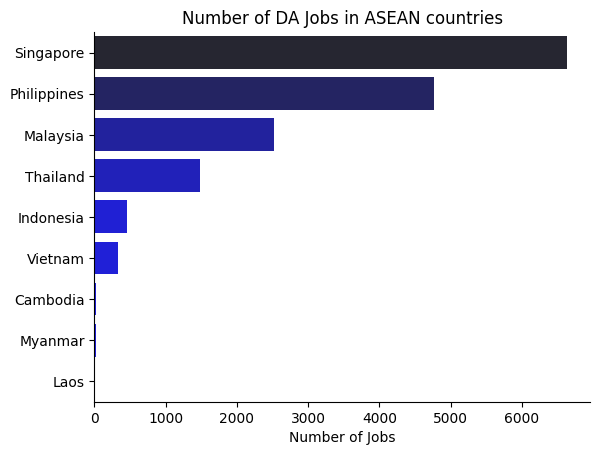

In [10]:
sns.barplot(
    data=df_plot,
    x= 'count',
    y= 'job_country',
    hue = 'count',
    palette = 'dark:b_r',
    legend= ''
    )

sns.despine() # remove the upper border and right border of the chart area.
plt.title('Number of DA Jobs in ASEAN countries')
plt.xlabel('Number of Jobs')
plt.ylabel('')



3. Job Opportunities

- Copy the code from [04.02. MatPlotLib_Pie_Plots](../04.%20MatPlotLib%20Advanced/04.02.%20MatPlotLib_Pie_Plots.ipynb)

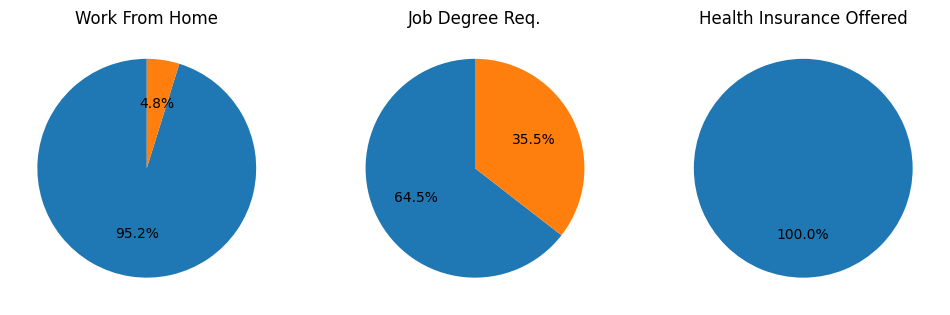

In [15]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))
dict_column = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()): # enumerate turns key-value pairs into tuples
    ax[i].pie(df_DA_SEA[column].value_counts(),startangle=90, autopct= '%1.1f%%')
    ax[i].set_title(title)

4. `Companies` to explore

Text(0, 0.5, '')

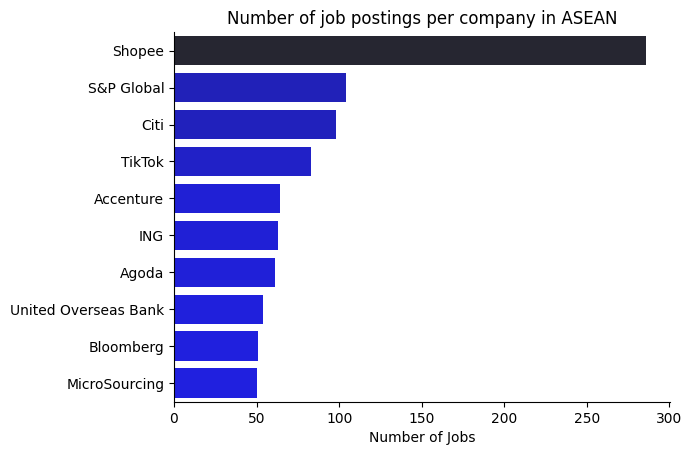

In [22]:
df_plot1 = df_DA_SEA['company_name'].value_counts().head(10).to_frame()

sns.barplot(
    data=df_plot1,
    x= 'count',
    y= 'company_name',
    hue = 'count',
    palette = 'dark:b_r',
    legend= ''
    )

sns.despine() # remove the upper border and right border of the chart area.
plt.title('Number of job postings per company in ASEAN')
plt.xlabel('Number of Jobs')
plt.ylabel('')